<a href="https://colab.research.google.com/github/kudaychandra/Screw_count/blob/main/Test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -qr requirements.txt

import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16836, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16836 (delta 1), reused 6 (delta 0), pack-reused 16825
Receiving objects: 100% (16836/16836), 15.58 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (11545/11545), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.6/862.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 16.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages

In [2]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lIXotyJeM47Lok521zWM")
project = rf.workspace("uday-sxn2y").project("screw-count")
version = project.version(11)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/Screw-count-11 in yolov5pytorch:: 100%|██████████| 452/452 [00:00<00:00, 7646.86it/s]


In [9]:
!python train.py --img 256 --batch 8 --epochs 55 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

Traceback (most recent call last):
  File "/content/yolov5/train.py", line 47, in <module>
    import val as validate  # for end-of-epoch mAP
  File "/content/yolov5/val.py", line 39, in <module>
    from models.common import DetectMultiBackend
  File "/content/yolov5/models/common.py", line 27, in <module>
    import ultralytics
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py", line 10, in <module>
    from ultralytics.data.explorer.explorer import Explorer
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/__init__.py", line 3, in <module>
    from .base import BaseDataset
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/base.py", line 17, in <module>
    from ultralytics.data.utils import FORMATS_HELP_MSG, HELP_URL, IMG_FORMATS
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/utils.py", line 19, in <module>
    from ultralytics.nn.autobackend import check_class_names
  File "/usr/local/lib/python3.10/dist-packages

In [10]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 1024 --conf 0.25 --source ../screw_test

detect: weights=['runs/train/exp/weights/best.pt'], source=../screw_test, data=data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/7 /content/screw_test/img1.jpg: 768x1024 48 screws, 685.8ms
image 2/7 /content/screw_test/img1_43_nosy.jpg: 704x1024 58 screws, 609.8ms
image 3/7 /content/screw_test/img2.jpg: 800x1024 46 screws, 667.1ms
image 4/7 /content/screw_test/img3.jpg: 576x1024 52 screws, 494.1ms
image 5/7 /content/screw_test/img4.jpg: 576x1024 48 screws, 473.8ms
image 6/7

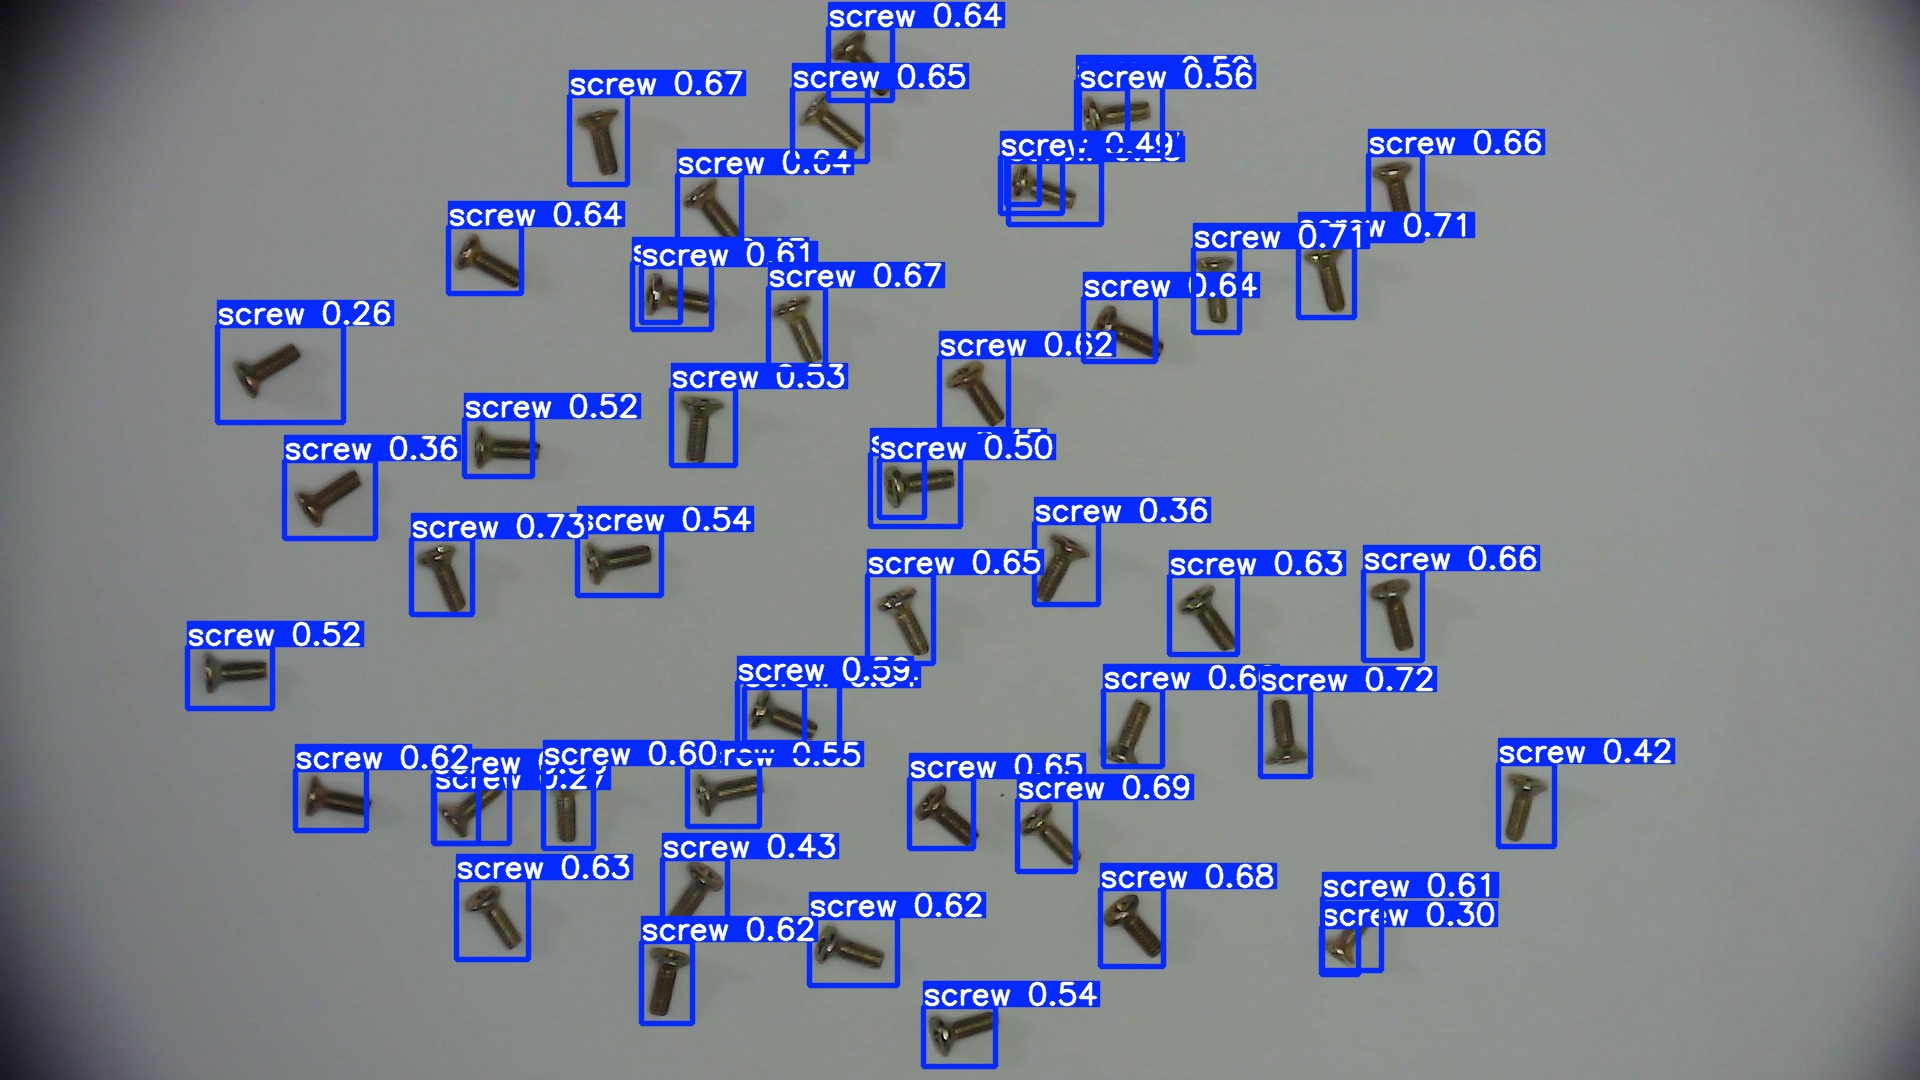

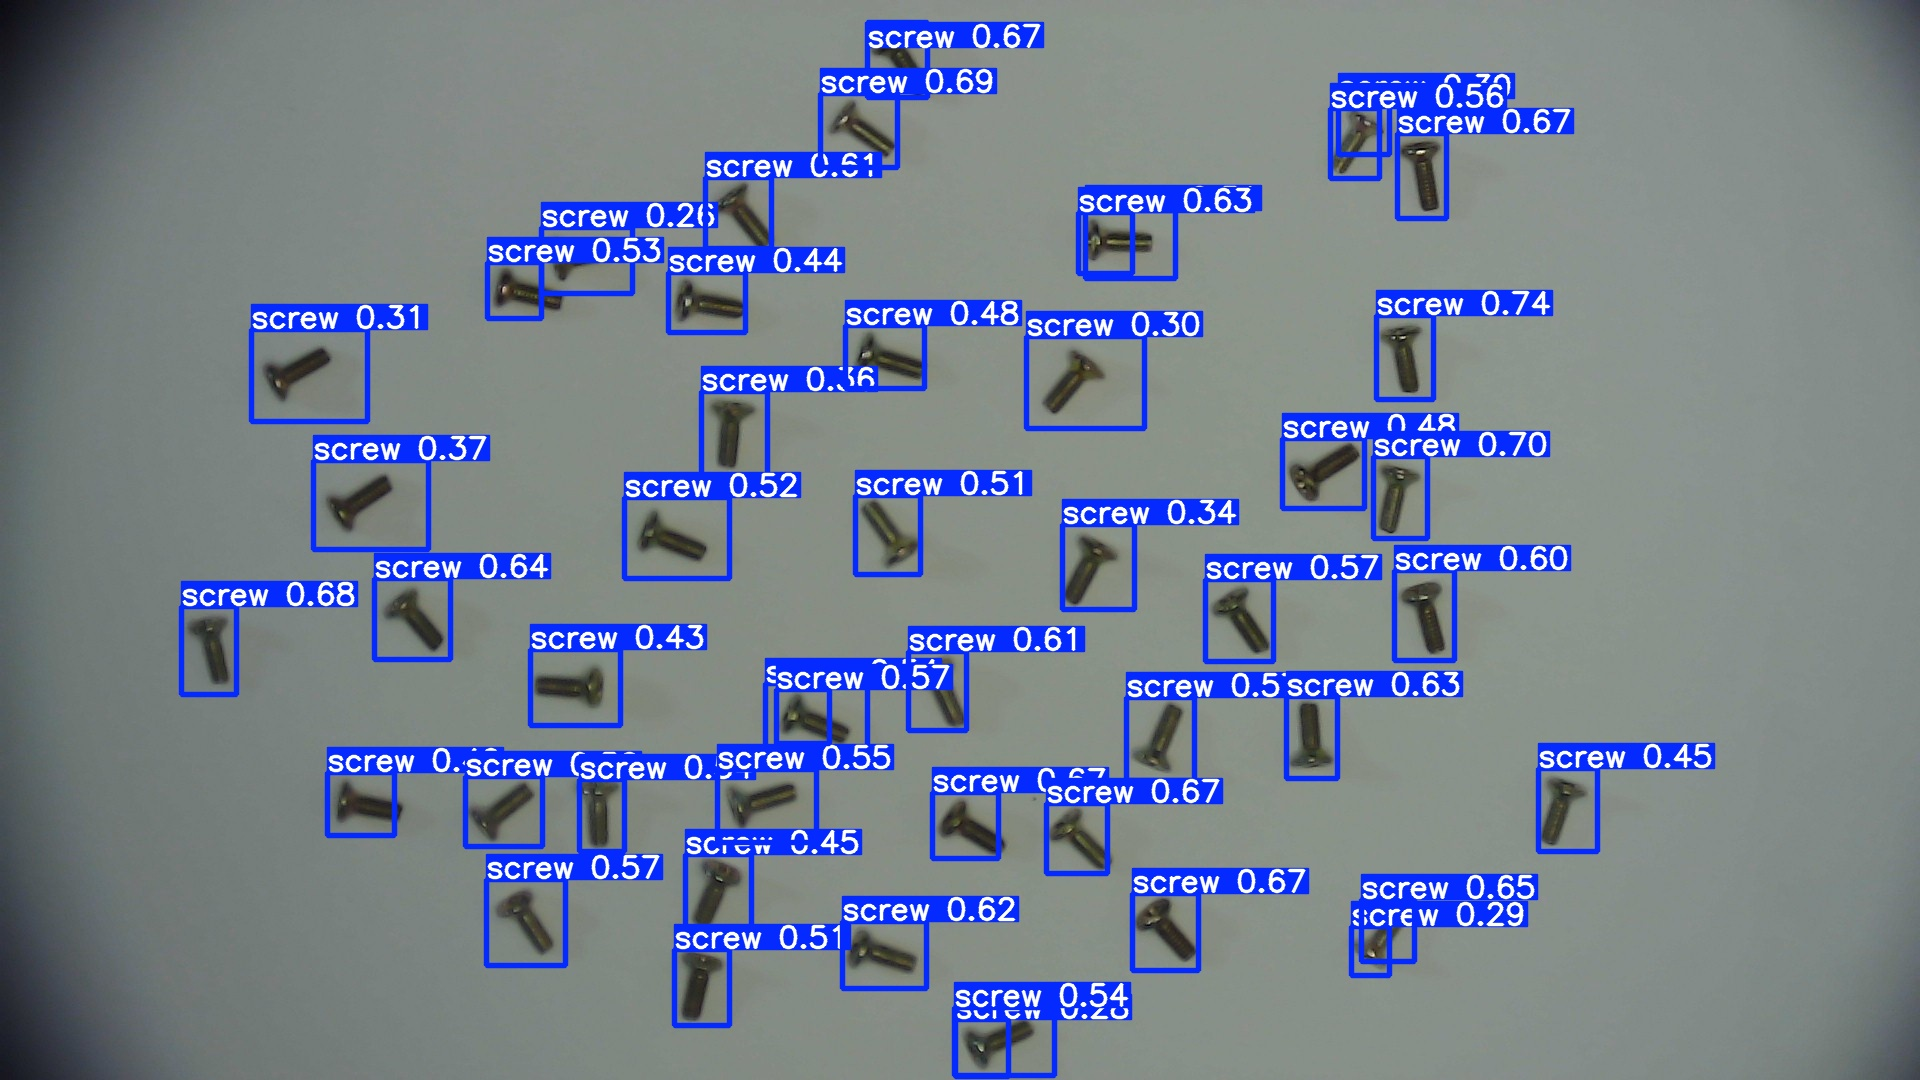

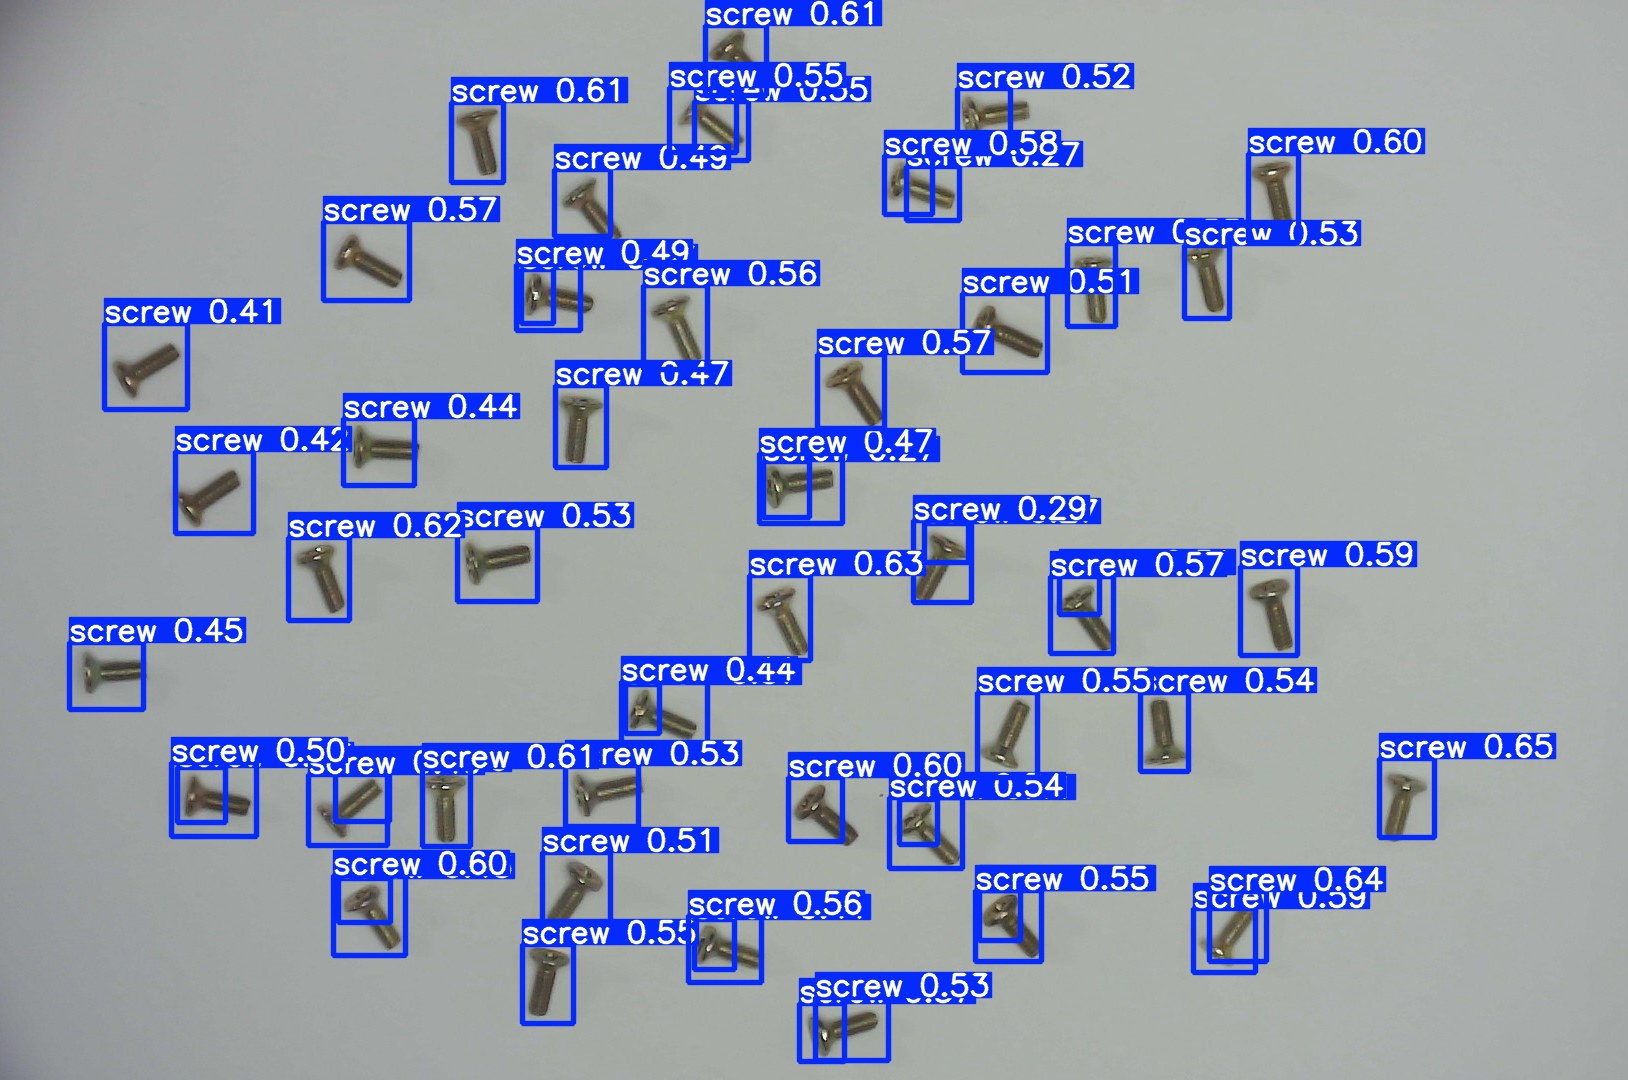

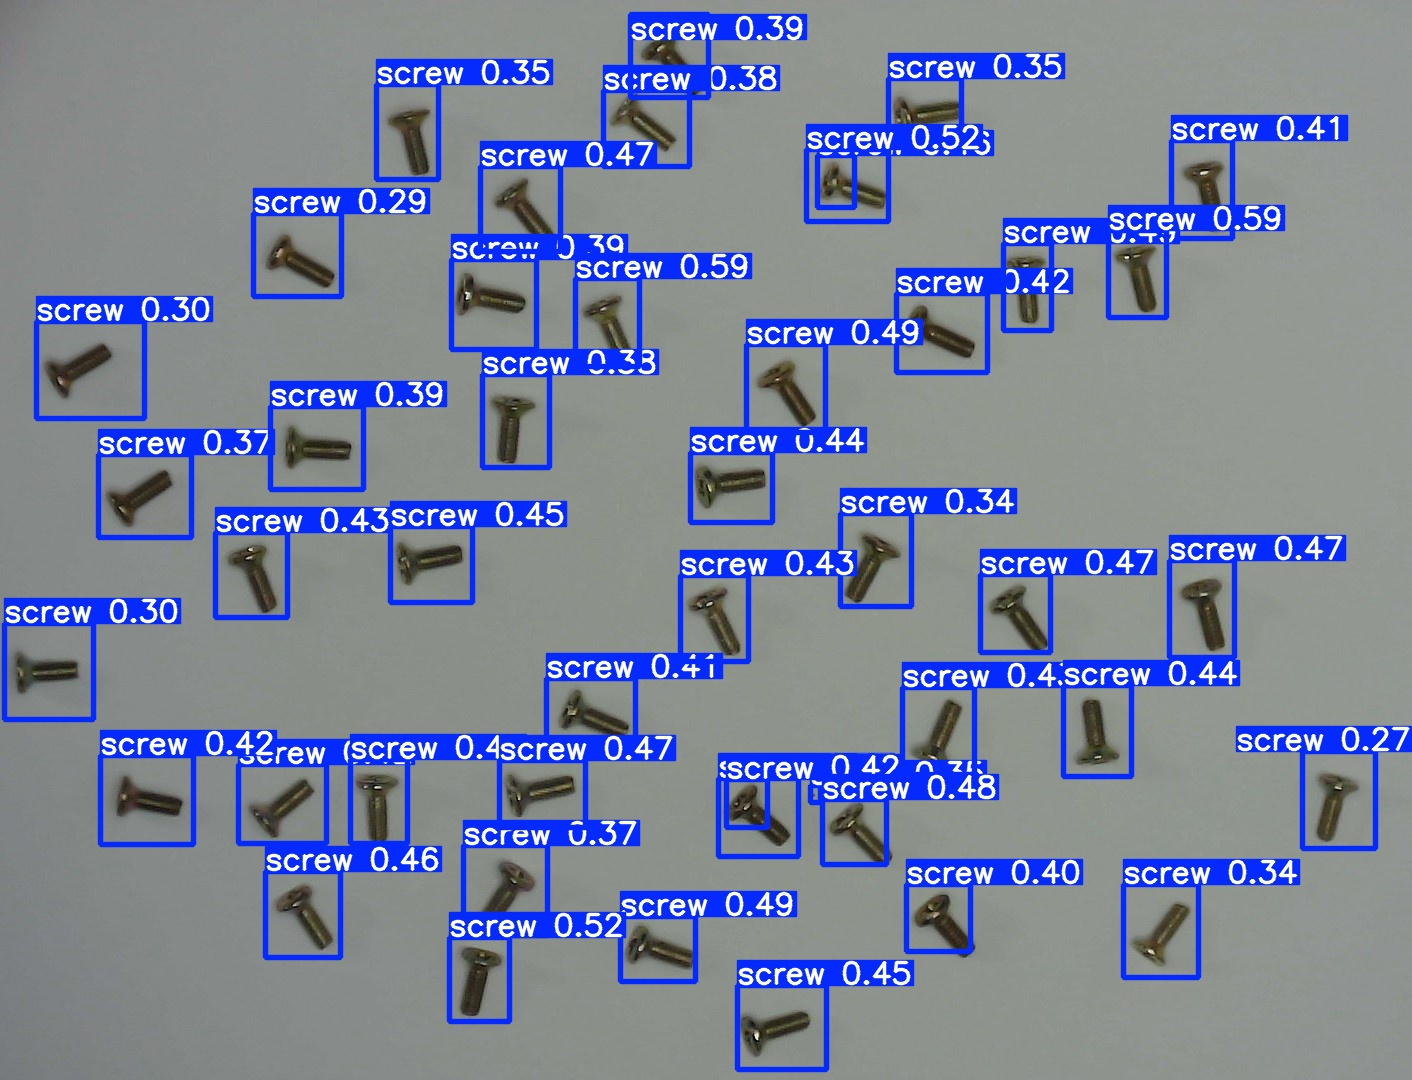

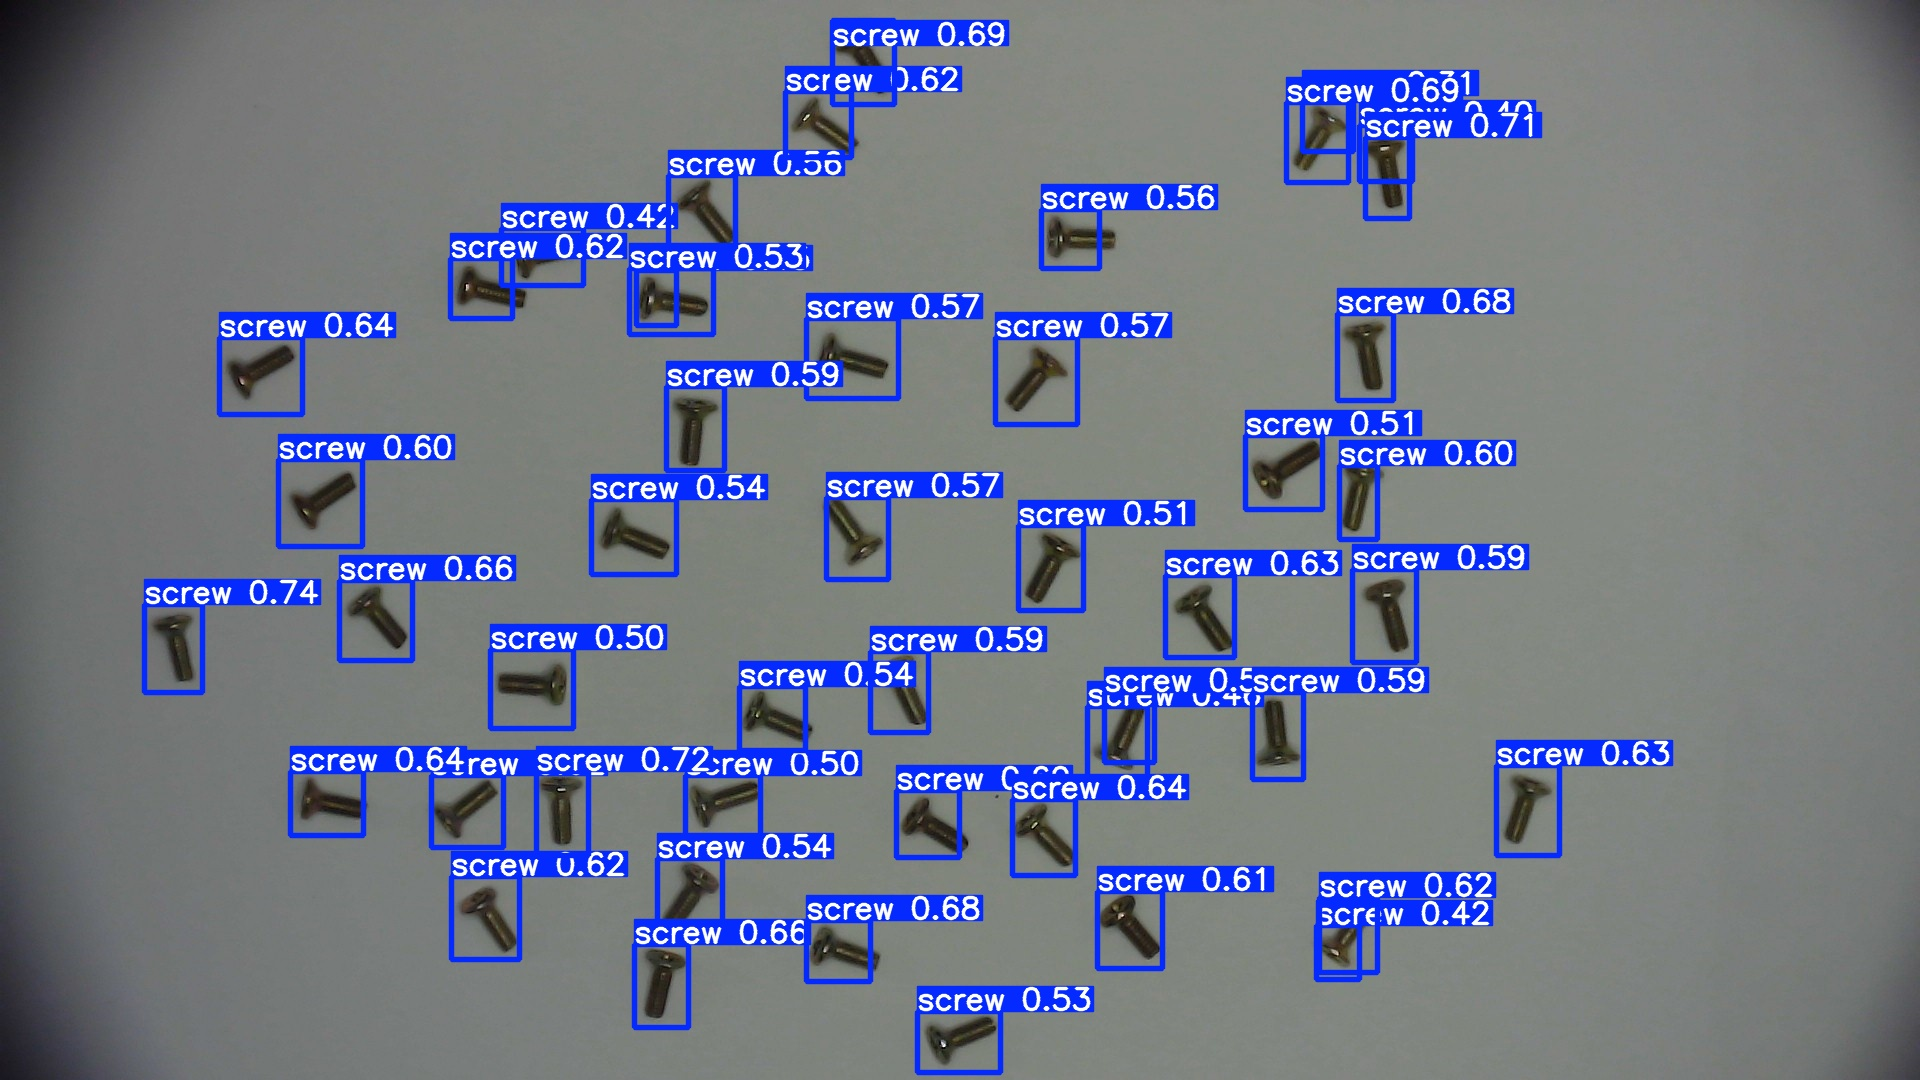

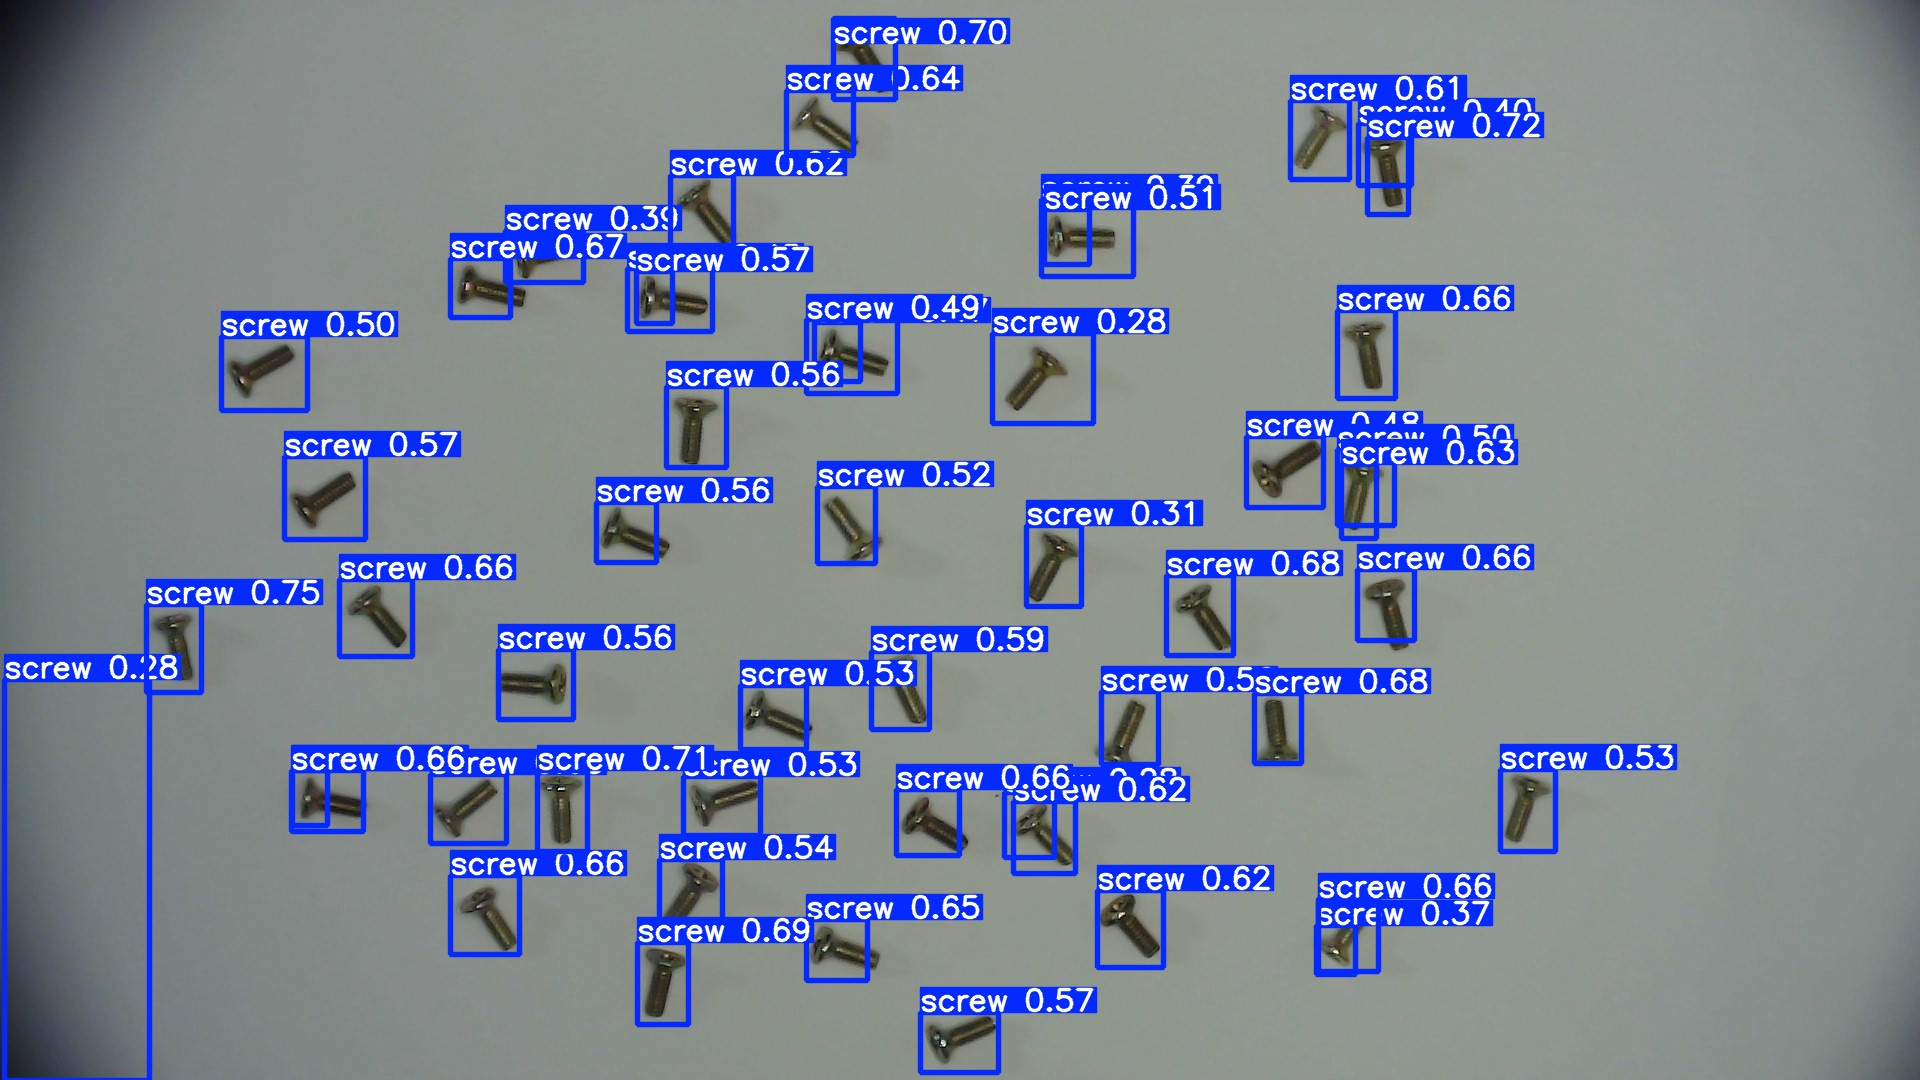

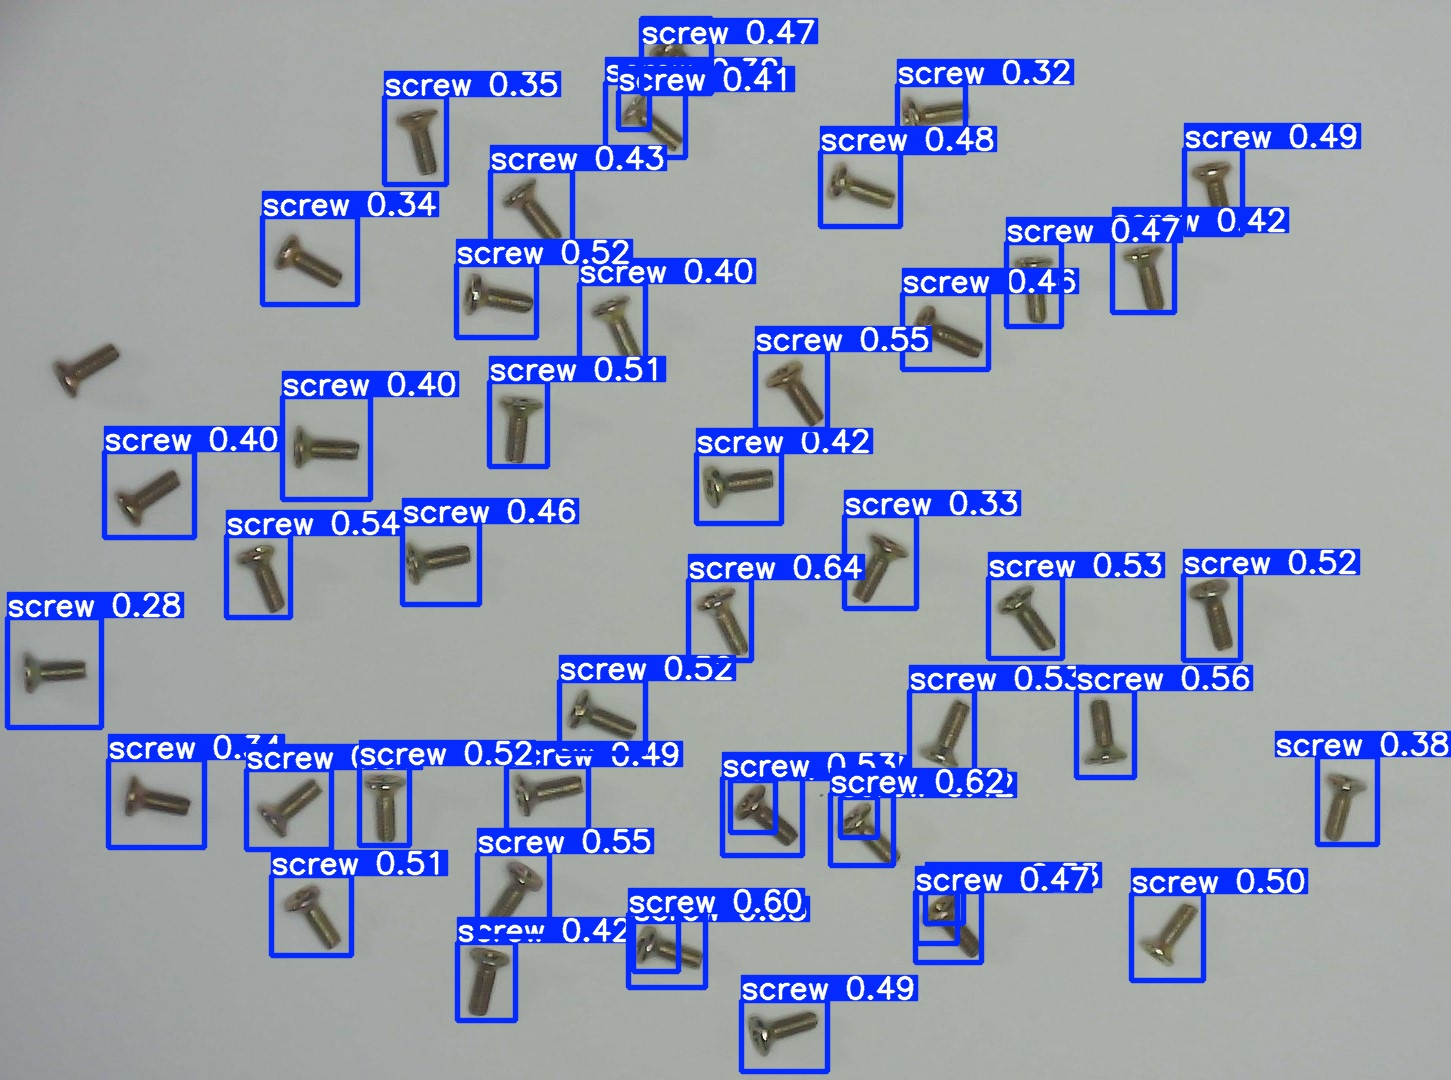

In [8]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

In [11]:
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>